In [ ]:
from google.colab import files
uploaded = files.upload()


Saving floods.xlsx to floods.xlsx


In [ ]:
import pandas as pd

# Load the dataset (replace 'flood_data.xlsx' with the actual filename if different)
df = pd.read_excel('floods.xlsx')

# Display the first few rows of the dataset
print(df.head())

# Display column names and check for missing values
print("Column names:", df.columns)
print("Missing values:", df.isna().sum())


   Unnamed: 0                   UEI           Start Date             End Date  \
0         563  UEI-IMD-FL-1967-0001  1967-02-07 00:00:00  1967-08-07 00:00:00   
1         564  UEI-IMD-FL-1967-0002          22-07-1967           28-07-1967    
2         565  UEI-IMD-FL-1967-0003  1967-01-08 00:00:00          30-08-1967    
3         566  UEI-IMD-FL-1967-0004  1967-08-09 00:00:00  1967-09-09 00:00:00   
4         567  UEI-IMD-FL-1968-0001          22-06-1968           28-06-1968    

   Duration(Days) Main Cause  \
0             7.0     floods   
1             7.0     floods   
2            30.0     floods   
3             2.0     floods   
4             7.0     floods   

                                           Districts  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...   
4                                       

In [ ]:
# Display column names and check for any missing values
print("Column names:", df.columns)
print("Missing values in each column:\n", df.isna().sum())

# Display unique values in 'Main Cause'
df['Main Cause'] = df['Main Cause'].str.strip()  # Remove any extra spaces
print("Unique values in 'Main Cause':", df['Main Cause'].unique())

# Display a sample of the data
print(df.sample(10))


Column names: Index(['Unnamed: 0', 'UEI', 'Start Date', 'End Date', 'Duration(Days)',
       'Main Cause', 'Districts', 'State', 'Human fatality', 'Human injured',
       'Human Displaced', 'Animal Fatality',
       'Description of Casualties/injured', 'Extent of damage'],
      dtype='object')
Missing values in each column:
 Unnamed: 0                              0
UEI                                     0
Start Date                             20
End Date                               20
Duration(Days)                         19
Main Cause                             31
Districts                              60
State                                   0
Human fatality                       3106
Human injured                        5818
Human Displaced                      6754
Animal Fatality                      6305
Description of Casualties/injured    3609
Extent of damage                     3121
dtype: int64
Unique values in 'Main Cause': ['floods' 'heavy rain' 'cloud burst' 'se

In [ ]:
# Filter data for flood events (case-insensitive)
floods = df[df['Main Cause'].str.contains('flood', case=False, na=False)]

# Check if the filtered DataFrame is empty
if floods.empty:
    print("No flood data available.")
else:
    print(f"Number of flood events: {floods.shape[0]}")
    print(floods.head())


Number of flood events: 2031
   Unnamed: 0                   UEI           Start Date             End Date  \
0         563  UEI-IMD-FL-1967-0001  1967-02-07 00:00:00  1967-08-07 00:00:00   
1         564  UEI-IMD-FL-1967-0002          22-07-1967           28-07-1967    
2         565  UEI-IMD-FL-1967-0003  1967-01-08 00:00:00          30-08-1967    
3         566  UEI-IMD-FL-1967-0004  1967-08-09 00:00:00  1967-09-09 00:00:00   
4         567  UEI-IMD-FL-1968-0001          22-06-1968           28-06-1968    

   Duration(Days) Main Cause  \
0             7.0     floods   
1             7.0     floods   
2            30.0     floods   
3             2.0     floods   
4             7.0     floods   

                                           Districts  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...   
4          

Unique values in 'Main Cause': ['floods' 'heavy rain' 'cloud burst' 'severe rain' 'torrential rain'
 'floodsed' 'moderate floods' nan 'inceasant rains'
 'floods, heavy landslides' 'incessant rains'
 'torential rain,heavy floods' 'flash floods' 'moderate to severe rain'
 'moderate' 'severe rain, moderate' 'very severe rain'
 'floods,cloud burst' 'moderate to severe rain, moderate'
 'severe rain, moderate to severe rain' 'moderate, severe rain'
 'flash floods in lohit river' 'erratic rains' 'incessant heavy rain'
 'heavy rain,moderate floods' 'severe rain, heavy rain'
 'modern floods, flash floods, heavy rain'
 'flash floods due to sudden cloud burst'
 'flash floods in vamsadhara river' 'floods in pennar river'
 'brahmaputra,its tributaries in moderate floods'
 'brahmaputra,its tributaries in floods' 'torrential rains'
 'kosi, kamala, ganga,mahananda rivers in floods'
 'flash floods in ghaggar river' 'moderate floods in chenab,tawi rivers'
 'flash floods in rambhan stream by a cloud burs

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


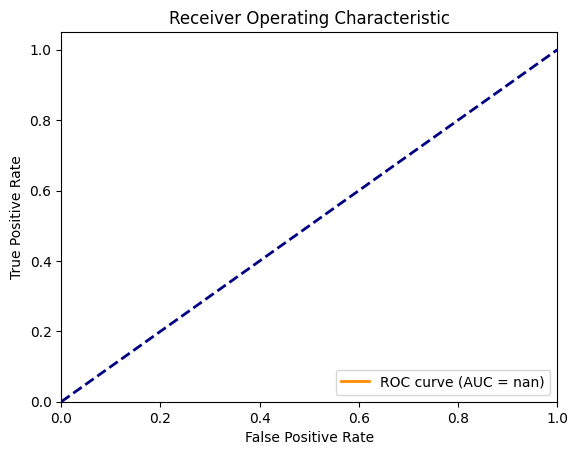

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_excel('floods.xlsx')

# Display unique values in 'Main Cause'
df['Main Cause'] = df['Main Cause'].str.strip()  # Remove any extra spaces
print("Unique values in 'Main Cause':", df['Main Cause'].unique())

# Filter data for flood events (case-insensitive)
floods = df[df['Main Cause'].str.contains('flood', case=False, na=False)]

# Check if the filtered DataFrame is empty
if floods.empty:
    print("No flood data available.")
else:
    # Define features and target variable
    X = floods[['Duration(Days)', 'Human fatality', 'Human injured']]
    y = (floods['Main Cause'].str.contains('flood', case=False)).astype(int)

    # Check if X and y have data
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    # Handle missing values
    X = X.fillna(0)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Check the shape of y_pred_proba
    if y_pred_proba.shape[1] == 2:
        y_pred_proba = y_pred_proba[:, 1]  # Probability for class 1
    else:
        print("The model's predict_proba output does not include both classes.")
        y_pred_proba = y_pred_proba[:, 0]  # Fallback: use the only available column

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model Accuracy: {accuracy * 100:.2f}%')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


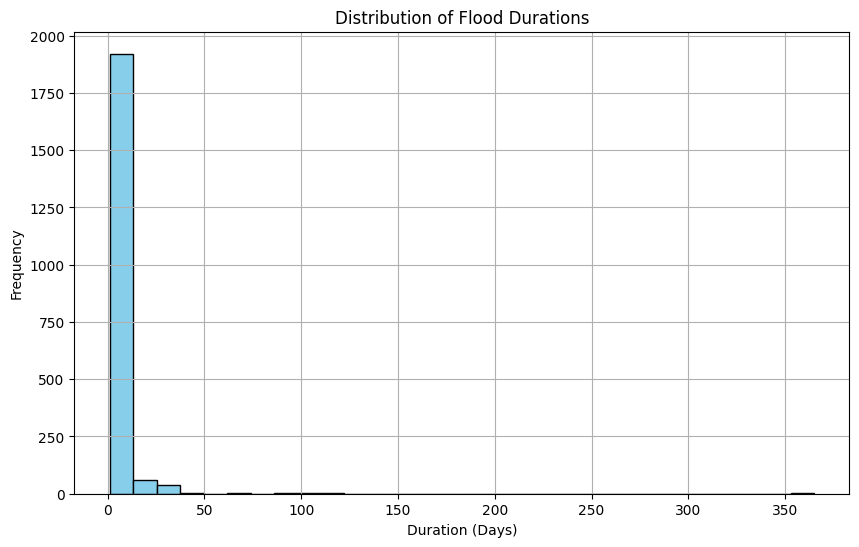

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of flood durations
plt.figure(figsize=(10,6))
plt.hist(floods['Duration(Days)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Flood Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


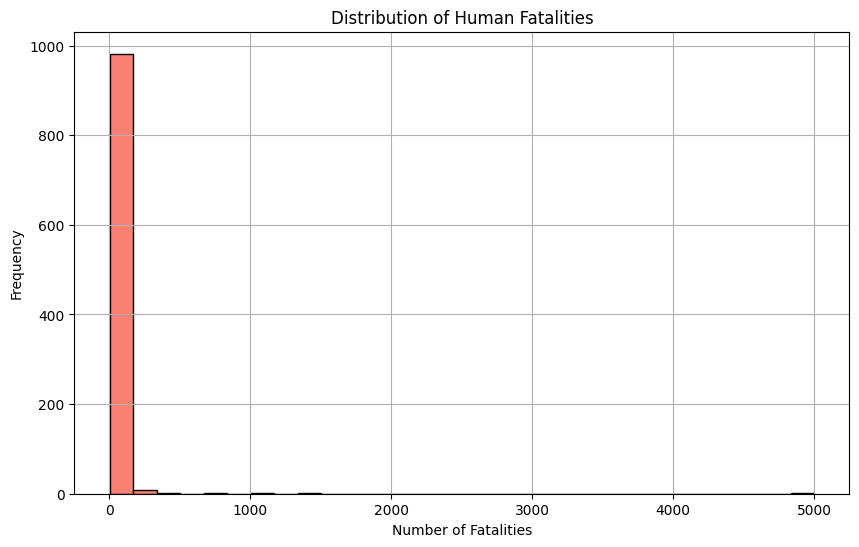

In [ ]:
# Plot the distribution of human fatalities
plt.figure(figsize=(10,6))
plt.hist(floods['Human fatality'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Human Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


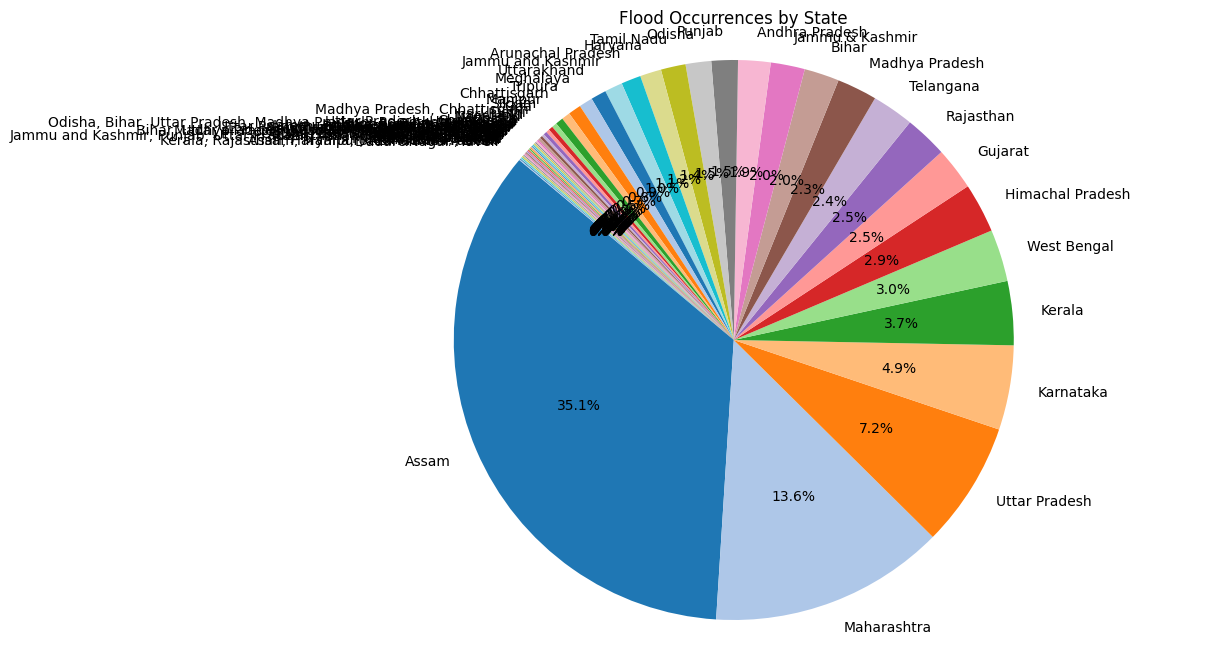

In [ ]:
# Group by 'State' and count the number of flood occurrences
floods_per_state = floods['State'].value_counts()

# Plot the number of floods by state (Pie Chart)
plt.figure(figsize=(12,8))
plt.pie(floods_per_state, labels=floods_per_state.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('Flood Occurrences by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<ipython-input-6-b61400b7b5a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods['Start Date'] = pd.to_datetime(floods['Start Date'], errors='coerce')
<ipython-input-6-b61400b7b5a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods['Year'] = floods['Start Date'].dt.year


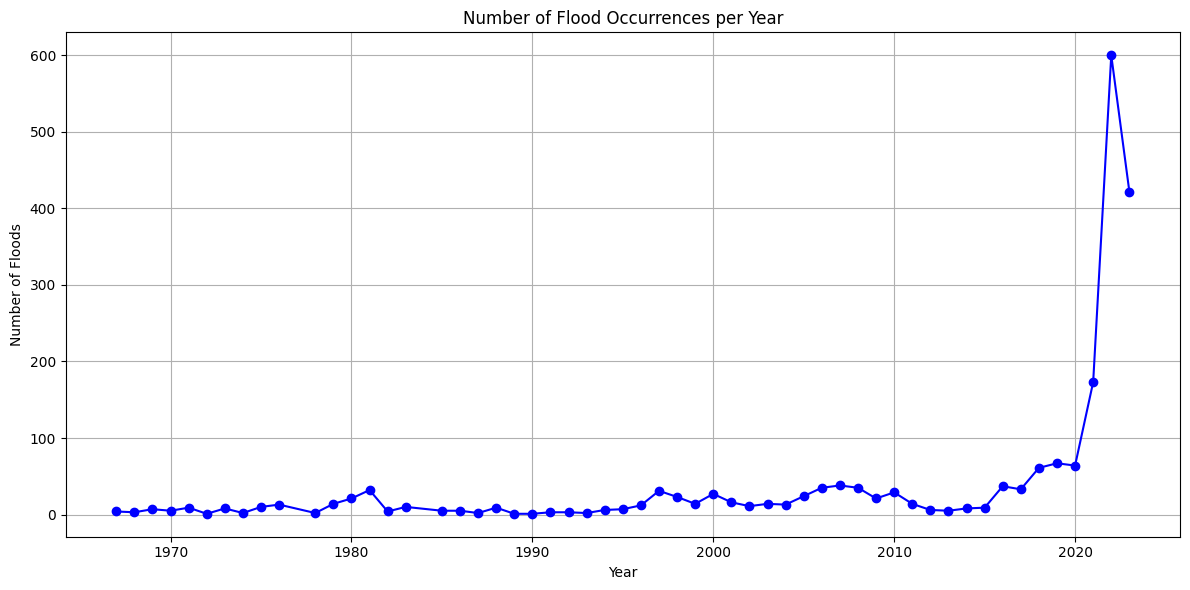

In [ ]:
# Convert 'Start Date' to datetime format and extract the year
floods['Start Date'] = pd.to_datetime(floods['Start Date'], errors='coerce')
floods['Year'] = floods['Start Date'].dt.year

# Group by year and count the number of flood occurrences
floods_per_year = floods.groupby('Year').size()

# Plot the number of floods by year
plt.figure(figsize=(12,6))
plt.plot(floods_per_year.index, floods_per_year.values, marker='o', color='b')
plt.title('Number of Flood Occurrences per Year')
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.grid(True)
plt.tight_layout()
plt.show()


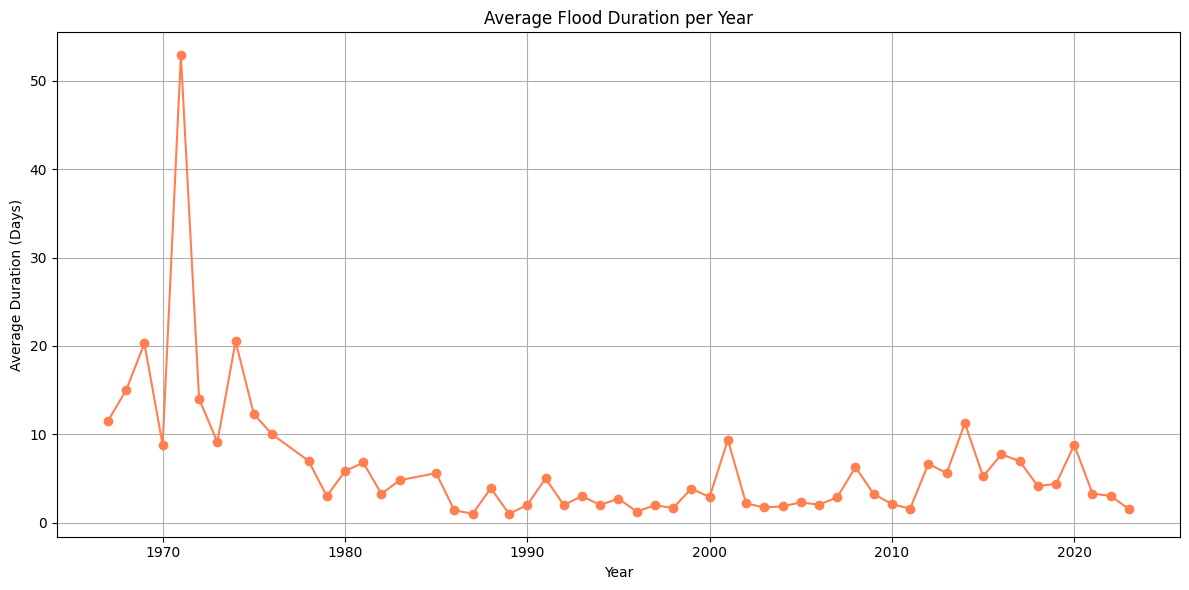

In [ ]:
# Group by year and calculate mean duration of floods
mean_duration_per_year = floods.groupby('Year')['Duration(Days)'].mean()

# Plot the mean flood duration per year
plt.figure(figsize=(12,6))
plt.plot(mean_duration_per_year.index, mean_duration_per_year.values, marker='o', color='coral')
plt.title('Average Flood Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (Days)')
plt.grid(True)
plt.tight_layout()
plt.show()


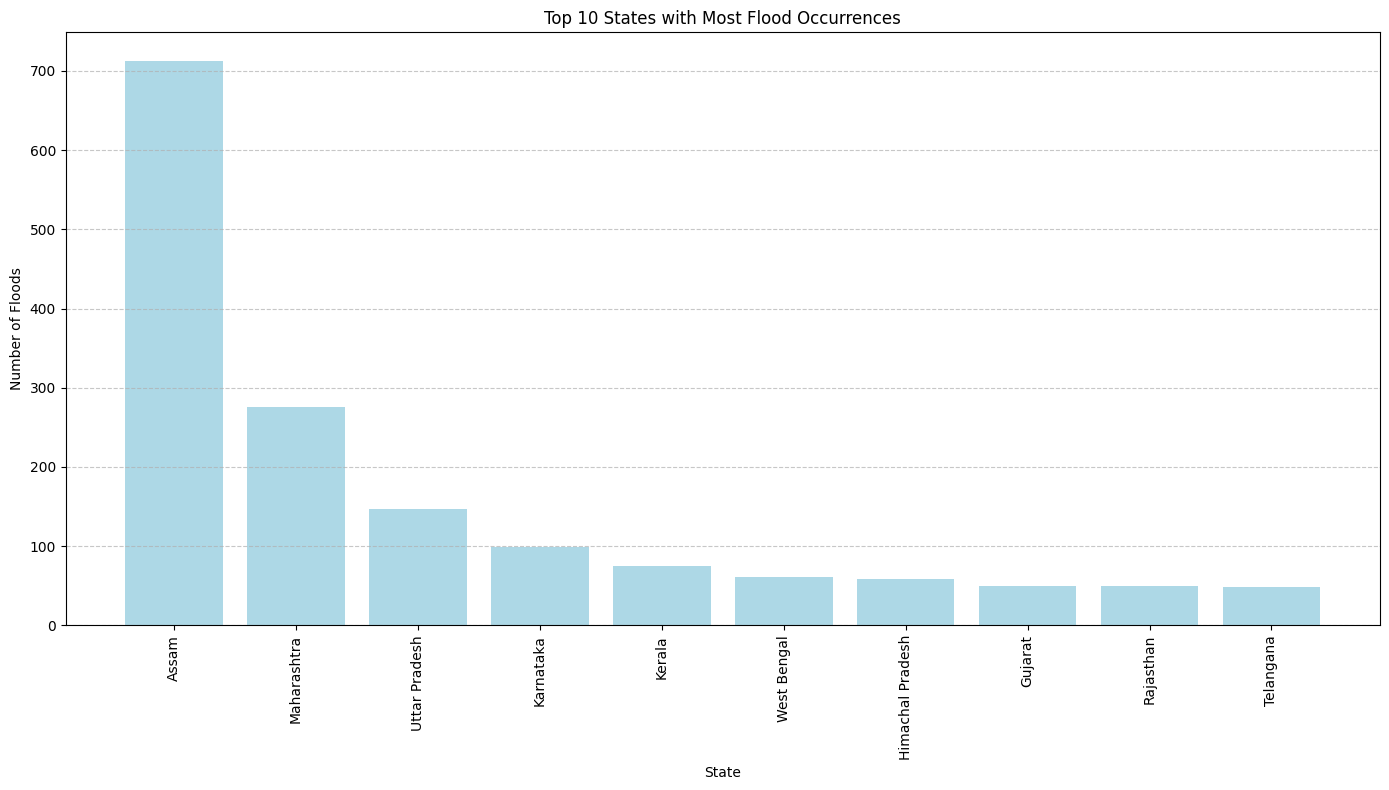

In [ ]:
import matplotlib.pyplot as plt

# Group by 'State' and count the number of flood occurrences
floods_per_state = floods['State'].value_counts()

# Get the top 10 states
top_10_states = floods_per_state.head(10)

# Plot the number of floods by state (Bar Chart)
plt.figure(figsize=(14,8))
plt.bar(top_10_states.index, top_10_states.values, color='lightblue')
plt.title('Top 10 States with Most Flood Occurrences')
plt.xlabel('State')
plt.ylabel('Number of Floods')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


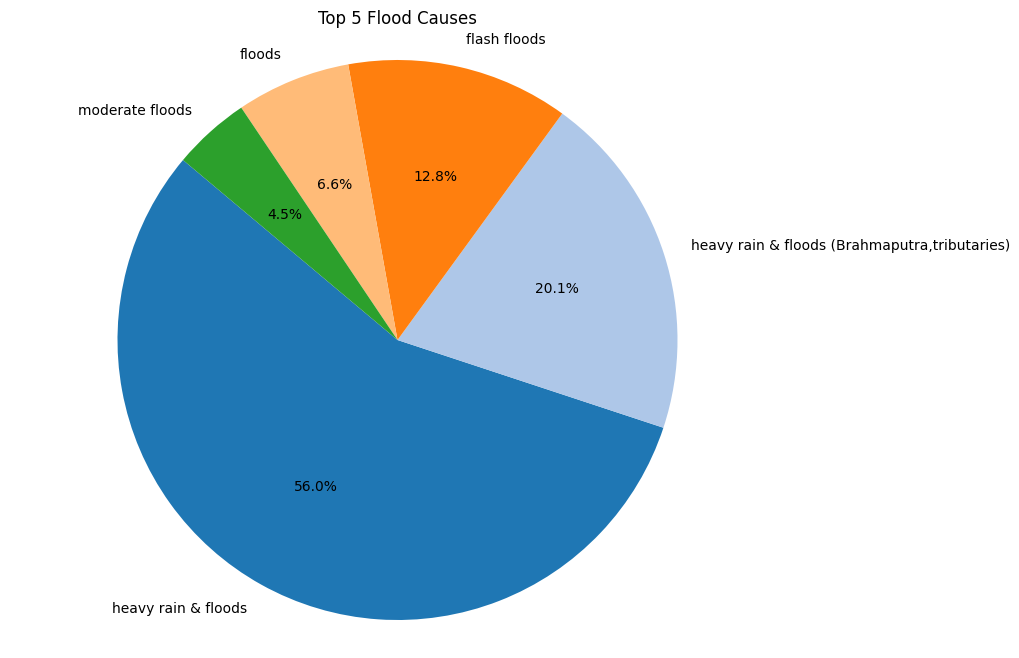

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Main Cause' has multiple causes
cause_distribution = floods['Main Cause'].value_counts()

# Get the top 5 causes
top_5_causes = cause_distribution.head(5)

# Plot the pie chart of the top 5 causes
plt.figure(figsize=(10,8))
plt.pie(top_5_causes, labels=top_5_causes.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('Top 5 Flood Causes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


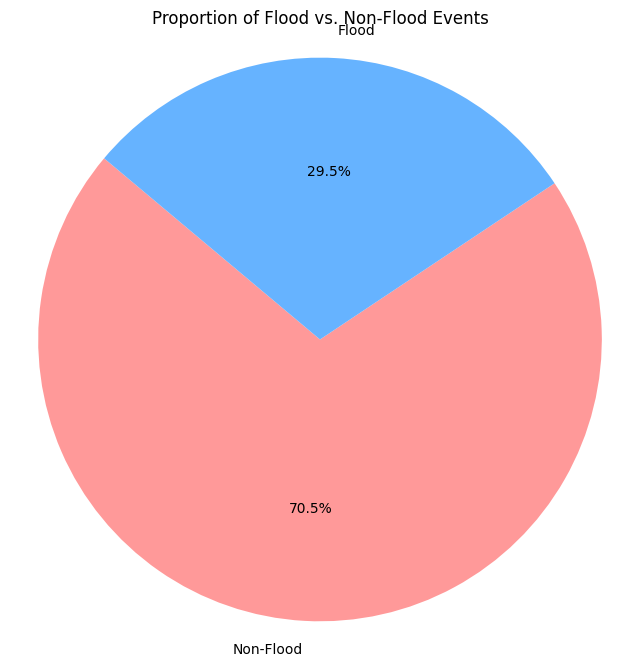

In [ ]:
# Assuming 'Main Cause' column can be used to determine flood vs. non-flood
flood_vs_non_flood = df['Main Cause'].str.contains('flood', case=False, na=False).value_counts()

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(flood_vs_non_flood, labels=['Non-Flood', 'Flood'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Flood vs. Non-Flood Events')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


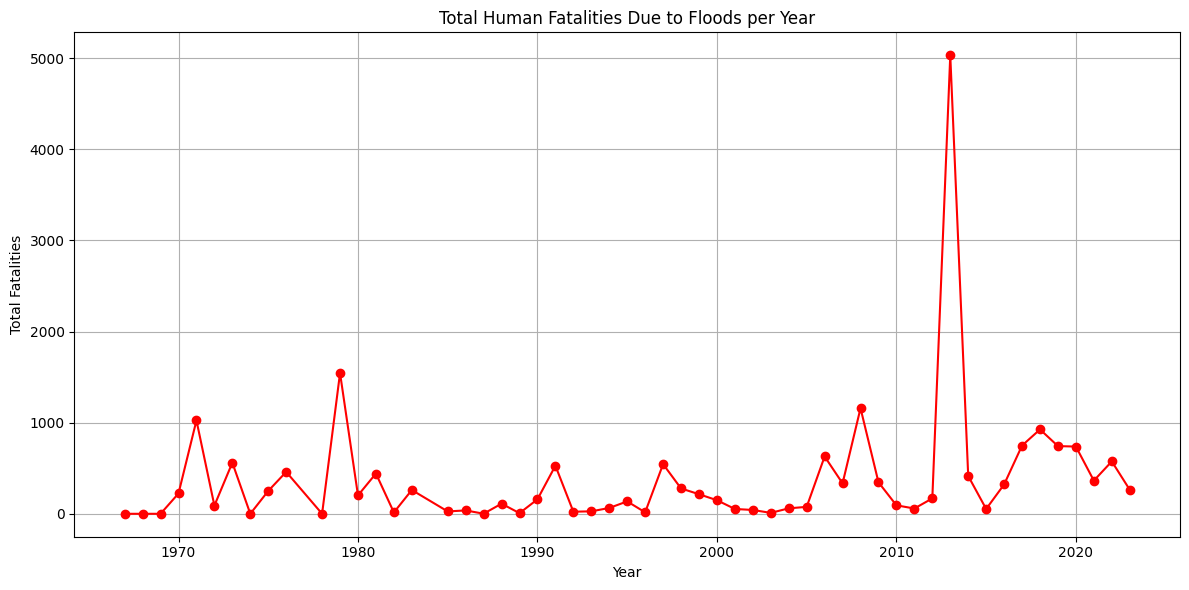

In [ ]:
# Group by year and calculate total fatalities
total_fatalities_per_year = floods.groupby('Year')['Human fatality'].sum()

# Plot total fatalities per year
plt.figure(figsize=(12,6))
plt.plot(total_fatalities_per_year.index, total_fatalities_per_year.values, marker='o', color='red')
plt.title('Total Human Fatalities Due to Floods per Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.tight_layout()
plt.show()


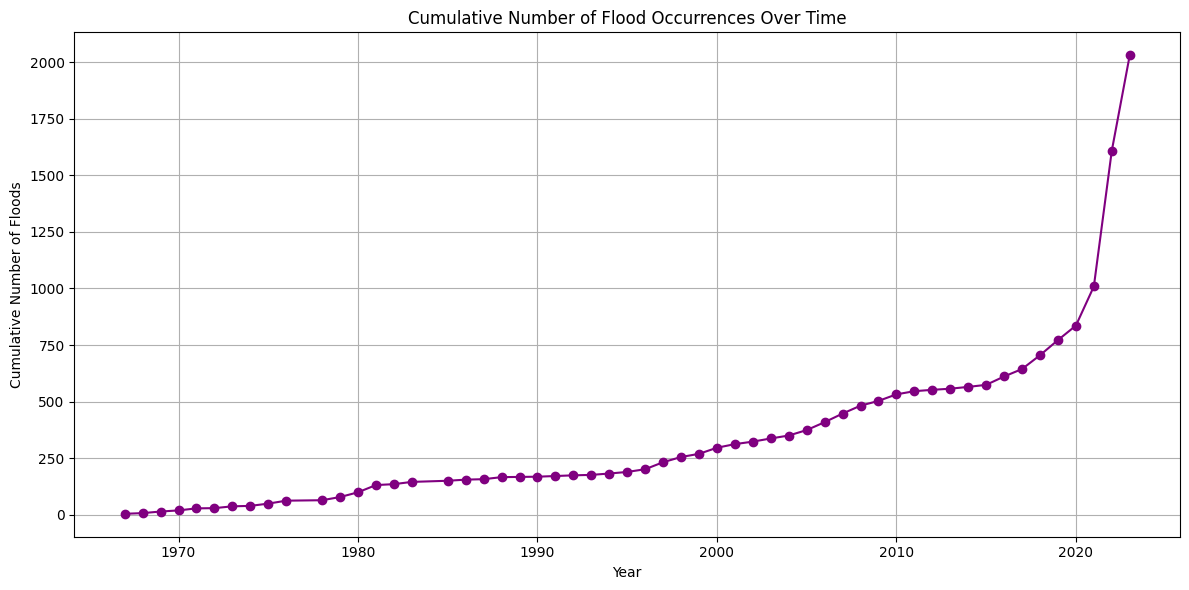

In [ ]:
# Sort data by year and calculate cumulative sum of flood occurrences
cumulative_floods = floods.groupby('Year').size().cumsum()

# Plot the cumulative number of floods over time
plt.figure(figsize=(12,6))
plt.plot(cumulative_floods.index, cumulative_floods.values, marker='o', color='purple')
plt.title('Cumulative Number of Flood Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Floods')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-19-f2d277febdcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods['Month'] = floods['Start Date'].dt.month


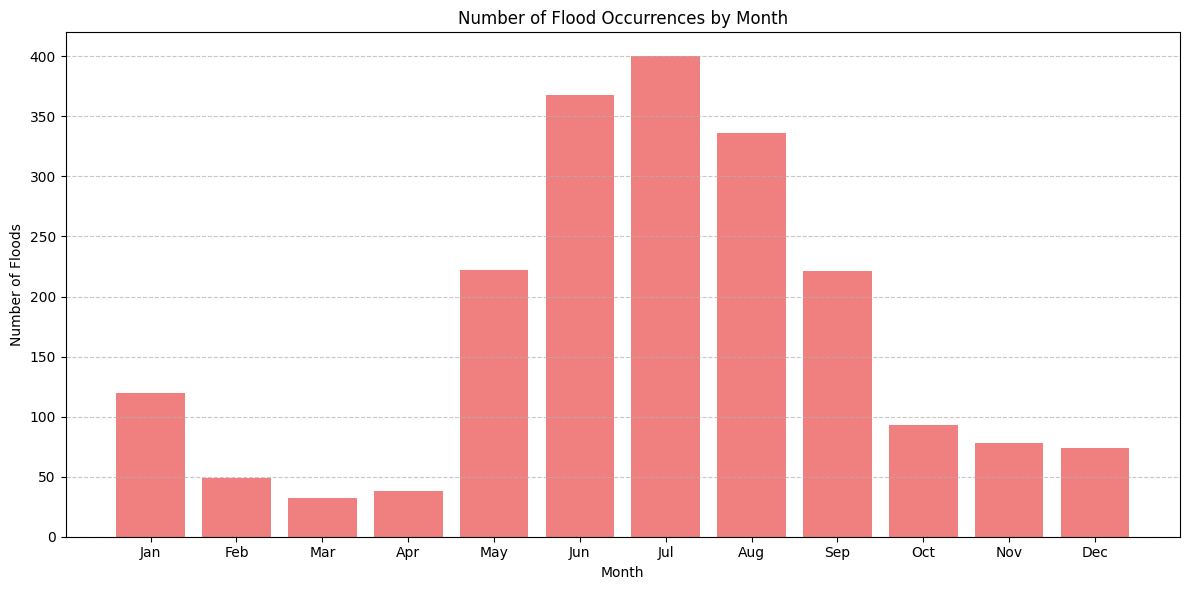

In [ ]:
# Extract month from 'Start Date'
floods['Month'] = floods['Start Date'].dt.month

# Group by month and count occurrences
floods_per_month = floods['Month'].value_counts().sort_index()

# Plot the number of floods by month
plt.figure(figsize=(12,6))
plt.bar(floods_per_month.index, floods_per_month.values, color='lightcoral')
plt.title('Number of Flood Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Number of Floods')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-28-e10ef679b28a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods['Duration Category'] = pd.cut(floods['Duration(Days)'], bins=bins, labels=labels, right=False)


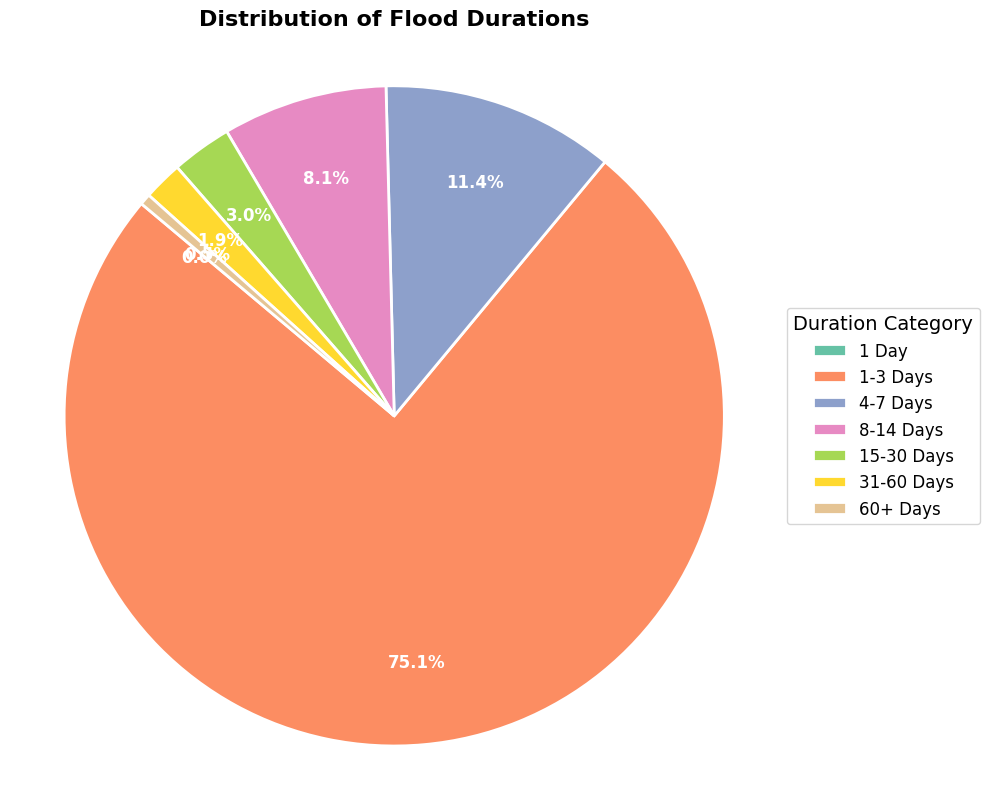

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins for flood duration ranges
bins = [0, 1, 3, 7, 14, 30, 60, floods['Duration(Days)'].max() + 1]
labels = ['1 Day', '1-3 Days', '4-7 Days', '8-14 Days', '15-30 Days', '31-60 Days', '60+ Days']
floods['Duration Category'] = pd.cut(floods['Duration(Days)'], bins=bins, labels=labels, right=False)

# Calculate distribution of duration categories
duration_distribution = floods['Duration Category'].value_counts().sort_index()

# Create the pie chart with enhanced formatting
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.get_cmap('Set2')(range(len(duration_distribution)))  # Use Set2 color palette

# Plot the pie chart
wedges, texts, autotexts = ax.pie(
    duration_distribution,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # White borders for clarity
    pctdistance=0.75,  # Percentage text closer to the center
    textprops={'fontsize': 12, 'weight': 'bold'}  # Text styling for labels
)

# Add a legend outside the pie chart instead of adding all labels directly on the chart
ax.legend(
    wedges,
    duration_distribution.index,
    title="Duration Category",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Adjust position of the legend
    fontsize=12,
    title_fontsize=14
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage text color to white for contrast
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Set title with better spacing and bold styling
ax.set_title('Distribution of Flood Durations', fontsize=16, weight='bold', pad=20)

# Ensure the pie chart is circular
ax.axis('equal')

# Show the plot with tight layout
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Start Date' to datetime and extract time-based features
floods['Start Date'] = pd.to_datetime(floods['Start Date'], errors='coerce')
floods['Year'] = floods['Start Date'].dt.year
floods['Month'] = floods['Start Date'].dt.month

# Define seasons based on months
def season_of_month(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

floods['Season'] = floods['Month'].apply(season_of_month)

# Selecting features for the model
X = floods[['Duration(Days)', 'Human fatality', 'Human injured', 'Animal Fatality', 'Month']]
y = floods['Main Cause'].str.contains('flood', case=False).astype(int)

# Handling missing values by filling with 0
X.fillna(0, inplace=True)


<ipython-input-35-481935996c29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods['Start Date'] = pd.to_datetime(floods['Start Date'], errors='coerce')
<ipython-input-35-481935996c29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods['Year'] = floods['Start Date'].dt.year
<ipython-input-35-481935996c29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https